
<img src="../Resources/Images/Slides-Logo.png" alt="Drawing" style="width: 400px;"/>

<center> <a href='https://www.linkedin.com/in/raulm8/'>by Raul Maldonado</a></center>

# 1.0 Overview

## 1.1 Introduction


This code is designated for my PyBay2019 talk on a (frequentist) approach to A/B Testing, in Python.

For documented remarks and commentary, [you can find out more from the Slide Deck](https://docs.google.com/presentation/d/1nr8O-hS070yhBZoc5KtMQgEdremG0-oZP0ujUnocELc/edit?usp=sharing).

Enjoy! :D


## 1.2 AB Testing

### 1.2.1 Theory +more

A/B Testing is "[a randomized experiment of two variants, A and B.]((https://en.wikipedia.org/wiki/A/B_testing))” This test quantitatively compares two versions with a single variable to compare what variant was effective. 

For example, let's say we ran a digital ad campaign, with the following text. Using that text script, we want an engaging background behind us to get a higher % of clicks, Click Through Rate (CTR), between two backgrounds, see below.

What is a better background to run this ad campaign on? Moreover, is it better than the other option--that is, is it more significant than the original/control option to switch to a different background, the variant option?

# 2.0 The Format

Generally, A/B tests are abstractly in the form of the following format:

![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))

0. Preface
1. Define collected sample data
2. State your Assumptions, Segments, and Metric of Change
3. State your Hypothesis
4. Run your experiment
5. Conclusion

____
In the statistics world, "Hypotheses tests", or in industry A/B tests, individuals are taught the following structure for determining your assumptions and calculations in your test:

![AB-Testing-Choices-Tree](../Resources/Images/AB-Testing-Choices-Tree.png)


## 2.1 The Format: Test Statistic, A La Carte

However, both depending on the question one is asking and the type of data you've acquired, one has to be careful on what is the appropriate test statistic and assumptions to use, from the following

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)



Once selecting the appropriate test statistic and having the right assumptions, we can go more deeply into the calculations. In the case of our metric of choice, CTRs, we are using % calculations outside of the range of [0-1] between two groups, we could choose either of the following A/B Test formats....

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Current-Scenario.png)


## 2.2 Test of Proportions

Let the proportion $p_i$ be defined as $p_i =\tfrac{x_i}{n_i}$, 

where $x_i$ are the successes and $n_i$ is the total count of the sample.

After consideration of assumptions like a statement of the significance level $\alpha$, covered later, we...

State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$

$H_1: \bar{p_1} - \bar{p_2} \neq 0$

From there, we calculate the test statistic $t$ from our provided information

Test Statistic:

$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{p_1 (1-p_1)}{n_1}) + (\tfrac{p_2 (1-p_2)}{n_2})}$

Thereafter, we calculate or find our referred critical test statistic $t^*$, related to our problem statement.

Lastly, a conclusion would be made for this specific test.


### 2.3 Chi Square Test (Optional)

Relatably, we can use a similiar process and test statistic in evaluation of proportions. 

Let us have a 2x2 frequency table where columns are two groups of respondents and rows are the two responses "successes" and "failures". 


|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | X_1    | Y_1         | X_1 + Y_1  | 
| Test 2 | X_2    | Y_2         | X_2 + Y_2   |
| Total  | x      | x           | x   | 

Then we can provide an equivalent A/B test for the upcoming CTR metric as followed:


State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$

$H_1: \bar{p_1} - \bar{p_2} \neq 0$

Test Statistic:

$\chi^2= \tfrac{(O-E)^2}{E}$, 

where $O$ are the Observed values and $E$ are the Expected values.

> Note:
Expected values are calculated as such:
> For the top left region, it would be $\tfrac{( x_{Clicks} * (X_1 + Y_1)}{x_T }$

|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | $Y_1$    | $Y_1$         | $X_1 + Y_1$  | 
| Test 2 | $X_2 $   | $Y_2 $        | $X_2 + Y_2 $  |
| Total  | $x_{Clicks}$      | $x_{No Clicks}$        | $x_T$   | 

# 3.0 Testing Time

## 3.1 Preface

We define our variant groups to be Google Ad Campaigns promoting our portfolio in Google Search. The original variant, control, will have one type of "Call to Action", while the other has a different type of "Call to Action"

> Example of a Call of Action: "Sign Up for a free trial here!"

**Our existing process**

Users use Search for navigating in searches. User typically will see a list of responses for popular terms or keywords. When they query “data” or something related to our career, they will see an add. Moreover, they will see our add, if we win a bid on Google Ads.

**Experiment Goals**
Increasing exposure to potential prospects for future opportunities, as one of our channels


In [33]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
fileName = 'DataAnalystCampaignDailyStats-2019.csv'
filePath = os.path.join('..','Resources','Data',fileName)

## 3.1 Data Collection

**Randomized**

The Goodle Ads system will display ads for certain keywords, geo, or another segmentation, assuming several other considerations (e.g. bids). Moreover, we assume that our targeted audiences to be randomly selected between the two experiments.

> Note: There are actions to take in evaluating the underlying test structure is affected, as opposed to the data being influenced by something other than our experiment, e.g. system itself--AA Testing.

**Segmentation**

Our target audience is for individuals that search for key terms related to data, technology, or job descriptions for a career, via Google Ads. This is our demographic.

We assume a random data collection based on that segmentation of our experiment since the platform provides that. 

In [35]:
campaignsDf = pd.read_csv(filePath,skiprows=2)

## 3.2 State your Assumptions, Metric of Change, Sample Size & More

### 3.2.1 Assumptions

* Each event is independent from one another

* Sampling is a simple random sample.

* A user either clicks or does not click (an impression) for an ad

* Application of the Central Limit Theorem for normal distribution

* With an appropriate traffic size, the binomial-like distribution of this scenario reaches a Standard Normal (Gaussian) Distribution

### 3.2.2 Metric Of Choice

We determine what is our metric of choice for our test, aligned with our objectives. Now, we want users to reach out to us, after reviewing our portfolio--seeing an impact for our visibility objective.

However, the tracking for that is not set up in our system. Moreover, this ad campaign is an evaluation of the effective usability of the call to action we are implementing. 

Aligned with our objective to see what ad works for usability between the two variants, we select the Click Through Rate as our metric of choice.


![AB-Testing-Choices-Tree](../Resources/Images/pyBay_click.gif)

### 3.2.3 Sample Size, Minimum Detectable Effect, and Duration


Assume the pre-test ad's CTR performance was, on average, 1%. This baseline CTR measure is the prefacing measure that occurs before this experiment setup.

As we recall, we would want to see if there is a significant difference in the ads performance. Moreover, to consider our commitment into the consideration of a new ad campaign, regardless of if it is significantly different, we have a **minimum dectable effect (MDE)** for us to consider if this too was significantly different for us.

> An example of this is the consideration of cost of investment, change management, or risk.

**MDE** is defined as 

$\text{MDE}:=z \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_1(1-p_2)}{n_2}}$

With the Minimum Detectable difference in mind, we need to have a few other considerations in our testing:
1. Sample Size
2. Duration

Assuming the two samples have an estimated equal amount of observations with an estimate of $p_1$ & $p_2$, We can compute one variant's sample size to reach MDE as


$\text{MDE}:=z \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_2(1-p_2)}{n_2}} \implies z \sqrt{\tfrac{p(1-p)}{n}+\tfrac{p(1-p)}{n}}\implies$

$n= 2 p(1-p)(\tfrac{z}{\text{MDE}})^2$

Remember though, we have two variants. Therefore, thet total numner of samples neeed is 

$n = n_1 + n_2 = 4 p(1-p)(\tfrac{z}{\text{MDE}})^2 $


For duration, we identify it based on previous traffic history.

> As an example, if I need 1,000 total observations of the two groups, and I know I have 200 unique users search per week, then we would have to wait 5 weeks for our test to run, assuming same traffic flows through.

With all that being said, we have two collected samples for both respective variants, seen in the DataFrame below.


In [36]:
campaignsDf.head()

,Day,Campaign,Currency,Clicks,Impressions,Cost,CTR
0,2019-07-02,Data Analyst #3,USD,0,6,0.00,0.00%
1,2019-07-02,Data Analyst #2,USD,0,13,0.00,0.00%
2,2019-07-03,Data Analyst #3,USD,3,312,3.82,0.96%
3,2019-07-03,Data Analyst #2,USD,8,346,8.18,2.31%
4,2019-07-04,Data Analyst #3,USD,8,376,8.61,2.13%


We observe that the data contains dimension information, along with Clicks and Impressions features--none of these are not the CTR metric of choice.

Recall that CTR is calculated by the percentage of clicks to successes
$\text{CTR} := \tfrac{\text{Clicks}}{\text{Impressions}}$

Thus,

In [62]:
# CTR Calculation, and segmentation between two Ad Campaigns.
campaignsDf['CTR'] = campaignsDf['Clicks'] \
                    / campaignsDf['Impressions']

campaign1Conditional = campaignsDf['Campaign'] == \
                            'Data Analyst #2'
campaign2Conditional = campaignsDf['Campaign'] == \
                           'Data Analyst #3'
campaign1_Df = campaignsDf[campaign1Conditional] 
campaign2_Df = campaignsDf[campaign2Conditional]

In [64]:
# #1st Campaign's Distribution
# campaign1_Df['CTR'].plot(kind='hist')
# plt.title('Campaign #1 CTR Distribution')
# plt.xlabel('CTR (%)')
# plt.show()

In [65]:
# #2nd Campaign's Distribution
# campaign2_Df['CTR'].plot(kind='hist')
# plt.title('Campaign #2 CTR Distribution')
# plt.xlabel('CTR (%)')
# plt.show()

## 3.3 Hypothesis

We say our "**level of significance**", $\alpha$, is set to be $\alpha = .10$.

> This significance level $\alpha$ is the probability of rejecting the null hypothesis $H_0$, when it is true.

In [66]:
alpha = 0.10

![Distribution](../Resources/Images/cutOff-Distribution.png)

[Source](http://www.math.armstrong.edu/statsonline/5/5.3.2.html)

Our goal is to compare the means of two Ad groups and evaluate if there is a significant difference their average CTR performance. 

That is,

$H_0: \bar{p_1} - \bar{p_2} = 0$

> (i.e. There is no significant difference between the two campaigns)


$H_1: \bar{p_1} - \bar{p_2} \neq 0$

> (i.e. There is a significant difference between the two campaigns)

**Note:** We are not trying to prove that there is a significant differ. Rather, observing is this is the case. The implication of being rewarded for proving something other than the existing process leads to the dissalusion of proving ones self right, when that's not the case.

## 3.4 Analyze The Results

Recall that our test statistic is using the $t$ statistic defined as 

$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{\bar{p_1} (1-\bar{p_1})}{n_1}) + (\tfrac{\bar{p_2} (1-\bar{p_2})}{n_2})}$

> Note: When comparing between two groups, the notation $d:=\bar{p_1} - \bar{p_2}$ is introduced to simplify formula

In [67]:
# Proportion Calculations
n1 = campaign1_Df['Impressions'].sum()
p1 = campaign1_Df['Clicks'].sum() / campaign1_Df['Impressions'].sum()

n2 = campaign2_Df['Impressions'].sum()
p2 = campaign2_Df['Clicks'].sum() / campaign2_Df['Impressions'].sum()

We observe the means $\bar{p_1}$ & $\bar{p_2}$  

In [68]:
print(f"Group 1's Average CTR: {round(p1,2)}")

print(f"Group 2's Average CTR: {round(p2,2)}")

Group 1's Average CTR: 0.02
Group 2's Average CTR: 0.01



And standard errors SE

In [69]:
# Standard Error of Proportions Calculations
## Term 1
se1 = (p1 * (1- p1))/n1

## Term 2
se2 = (p2 * (1- p2))/n2


## Terms being squared for final result
standardError = np.sqrt(se1 + se2)

In [70]:
print(f"The Standard Error is calculated as: {round(standardError,6)}")

The Standard Error is calculated as: 0.003086


In [71]:
# T test statistic

tStatistic = (abs(p1-p2) - 0) / standardError

In [72]:
print(f'Campaign 1 CTR: {round(p1,4)}' + f' with Standard Error {se1}.')
print(f'Campaign 2 CTR: {round(p2,4)}' + f' with Standard Error {se2}.\n')

print(f'T Statistic: {round(tStatistic,2)}')

Campaign 1 CTR: 0.0166 with Standard Error 4.458492047466517e-06.
Campaign 2 CTR: 0.0134 with Standard Error 5.065161388057818e-06.

T Statistic: 1.05


In [73]:
# Critical T Value Test Statistic
criticalValue = scipy.stats.t.ppf(1.0 - 0.05, (n1 + n2-2))

#Two Sided P Value
one_side = 1 - scipy.stats.norm(loc = 0, scale = 1).cdf(tStatistic)
pValue = one_side * 2

In [74]:
print(f'We have critical value t^* at {round(criticalValue,2)}\nand p-value of {round(pValue,2)}')

We have critical value t^* at 1.65
and p-value of 0.3


## 3.5 Conclusions

If the calculated t-statistic $t$ > critical value $t^*$, then we reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_1$. 
> Equivalently, if $p < \alpha$, then we  reject the null hypothesis $H_0$. 

If not, then we fail to reject the null hypothesis $H_0$. 

In [75]:
if pValue < alpha:
    print("We reject the Null Hypothesis H_0")
else:
    print("We fail to reject the Null Hypothesis H_0")

We fail to reject the Null Hypothesis H_0


Therefore, we can say that there is no significant difference between the two campaigns.

# 4.0 +More! [Optional]

## 4.1 The Chai -err umm....Chi-Squared Test

In [21]:
df = [ [campaign1_Df['Clicks'].sum(), campaign1_Df['Impressions'].sum()- campaign1_Df['Clicks'].sum(),campaign1_Df['Impressions'].sum()], \
      [campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum() -campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum()] ]

In [22]:
from scipy import stats

twoByTwo_df = pd.DataFrame(df,index=['Campaign 1', 'Campaign 2'] ,columns=['Clicks','No Clicks','Impressions'])
# stats.chi2_contingency(twoByTwo_df)

In [23]:
twoByTwo_df

,Clicks,No Clicks,Impressions
Campaign 1,61,3607,3668
Campaign 2,35,2576,2611


In [24]:
expectedClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['Clicks'].sum() 

expectedNonClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['No Clicks'].sum() 

expectedDf = pd.concat([expectedClicksSeries,expectedNonClicksSeries],axis=1)

In [25]:
expectedDf.columns =['Clicks', 'No Clicks']
expectedDf


,Clicks,No Clicks
Campaign 1,56.080268,3611.919732
Campaign 2,39.919732,2571.080268


In [26]:
chiSquareStatistic = ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

In [27]:
((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

1.0540173010700733

In [31]:
chiSquareStat, pVal, dof, expected = stats.chi2_contingency(twoByTwo_df)

print('Expected Table: \n',expected,'\n')

# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob

criticalVal = stats.chi2.ppf(prob, dof)

print(f'Degrees of Freedom: {dof}\n')
print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, criticalVal, alpha))

print('Decision:')
print(f'For significance level {round(alpha,2)},\n')
if abs(chiSquareStat) >= criticalVal:
    print('We reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} >= {criticalVal}.')
else:
    print('We fail to reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} < {criticalVal}.')

    
### Alternatively can say:    
# if p <= alpha:
#     print('We reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} >= {alpha}.')

# else:
#     print('We fail to reject the Null Hypothesis, H_0.')
#     print(f'for p = {p} < {alpha}.')

Expected Table: 
 [[  56.08026756 3611.91973244 3668.        ]
 [  39.91973244 2571.08026756 2611.        ]] 

Degrees of Freedom: 2

probability=0.95, critical=5.99, stat=0.05 

Decision:
For significance level 0.05,

We fail to reject the Null Hypothesis, H_0

for p = 0.95 < 5.991464547107979.


# 5.0 Remarks & Random Notes

Prerequisite knowledge: Central Limit Theorem
The Central Limit Theorem (CLT) implies a sample of independent random variables, their sums tends towards to a normal distribution even if the original variables themselves aren't normally distributed, also the sample mean tends towards to a normal distribution (sum and mean are equivalent).



## 5.1 Chi Square Testing

* Chi-square goodness of fit test
    * Test that determines if a sample data matches a population. For more details on this type, see: Goodness of Fit Test.

* Chi-square test for independence
    * Test that compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    
    
## 5.2 Testing considerations

* Hyperfocusing on specific metric selections, rather than macro ones. (e.g. Wanting to increase Revenue is a goal, but what is the specific issue that you are tackling, to downstream speaking increase that)

## 5.3 Other Resources

### 5.3.1 Data Collection Section

#### 5.3.1.1 Uniform Distribution

In [20]:
n = 400
uniformDist = np.random.rand(n)
# [0.0, 1.0) distribution set

In [27]:
print(uniformDist[:4])

[0.03403842 0.84005661 0.5416037  0.15702651]


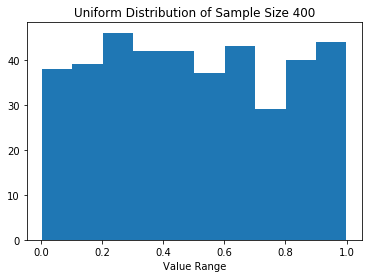

In [23]:
plt.hist(uniformDist)
plt.title(f'Uniform Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.1.2 Standard Normal Distribution

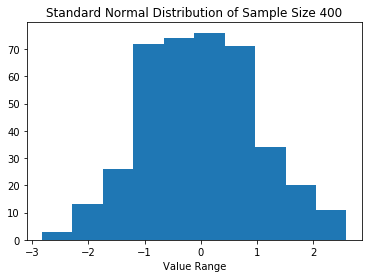

In [26]:
normalDist = np.random.randn(n)
# Mean 0 and Variance 1 Distribution Set
print(uniformDist[:4])

plt.hist(normalDist)
plt.title(f'Standard Normal Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.2.2 Proportion: Normal Approximation

For large values of n, the distributions of the count $X$ and the sample proportion are approximately normal due to the Central Limit Theorem, as it approximates the normal distribution like 

$\bar{X}$ ~ $N(\tfrac{np}{p},\tfrac{np(1-p)}{n^2}) = N(n, \tfrac{p(1-p)}{n})$

### 5.3.3 Data Collection Section

#### 5.3.3.1 Basesline Conversion Rate

Known in conversion-related AB testing calcilatsion, **baseline conversion rate** is the current conversion rate for the variant you’re testing.

> Conversion rate is the number of conversions divided by the total number of visitors.

# 6.0 Resources

* https://byrony.github.io/understanding-ab-testing-and-statistics-behind.html
    
* https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/

* https://docs.google.com/presentation/d/1k_zR5IkHaIpA6fbTDoa48Gh_LodY7Mjbf56zLro5Uus/edit#slide=id.g31d3c8507d_0_177
        
        
* https://stats.stackexchange.com/questions/76875/what-is-the-difference-between-mcnemars-test-and-the-chi-squared-test-and-how/141450#141450